![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


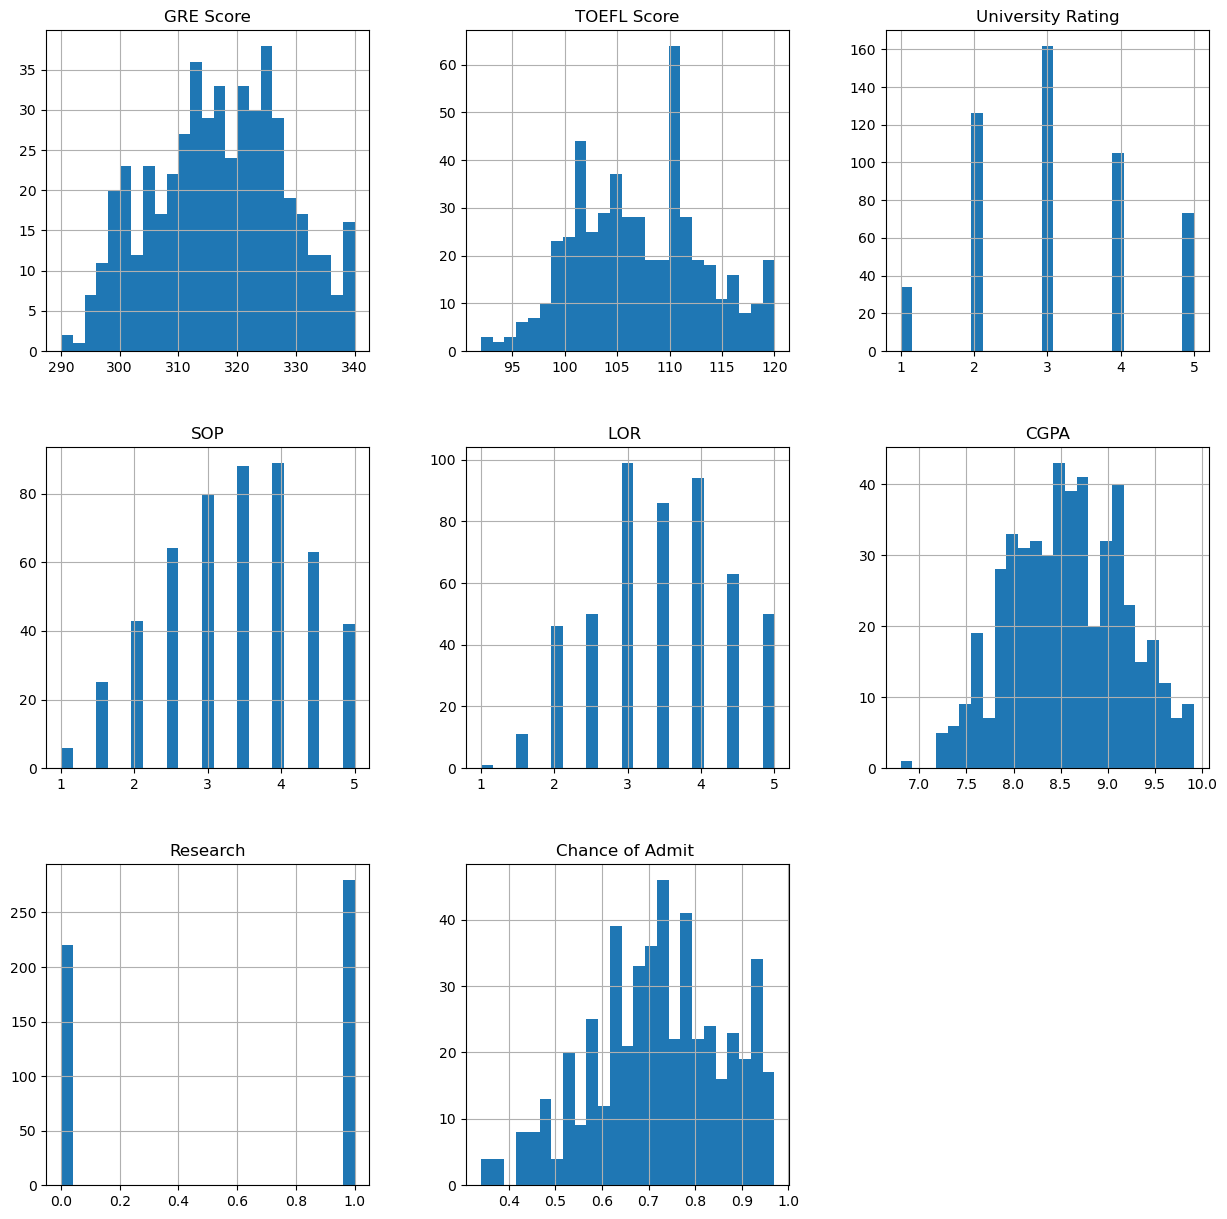

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[['Chance of Admit ']]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [7]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [8]:
output_var = Y_train.shape[1]
dims = X_train.shape[1]

In [9]:
# Celda 1
# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
K.clear_session()
model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))
print(model.summary())
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


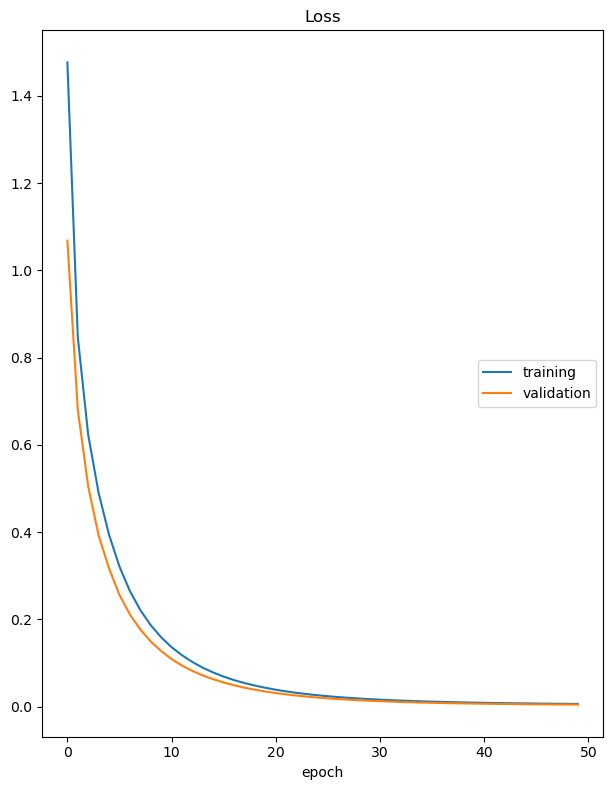

Loss
	training         	 (min:    0.006, max:    1.476, cur:    0.006)
	validation       	 (min:    0.005, max:    1.068, cur:    0.005)
5/5 [==============================] - 0s 2ms/step - loss: 0.0046
Error con mse
0.0046144514344632626


In [10]:
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])
mse =model.evaluate(X_test, Y_test)
print("Error con mse")
print(mse)

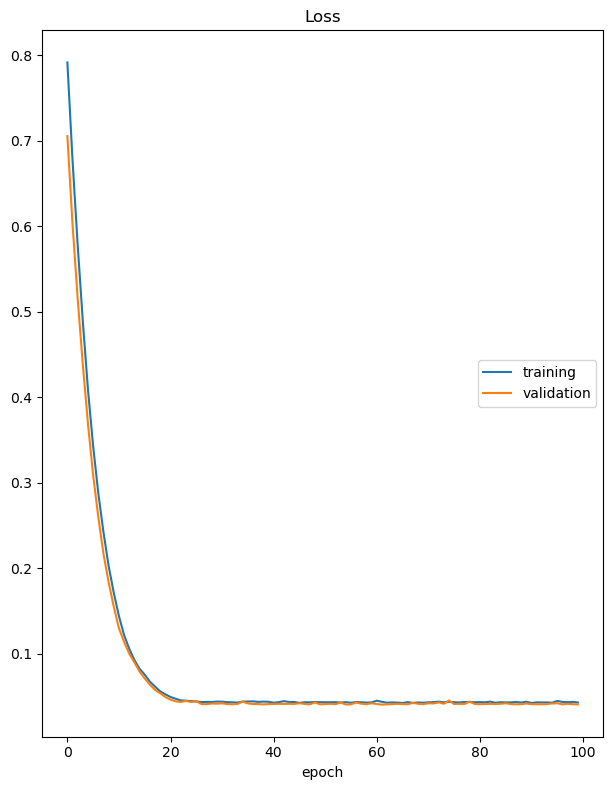

Loss
	training         	 (min:    0.042, max:    0.792, cur:    0.043)
	validation       	 (min:    0.040, max:    0.705, cur:    0.041)
5/5 [==============================] - 0s 2ms/step - loss: 0.0406
Error con MAE
0.040585752576589584


In [11]:
K.clear_session()
model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))
print(model.summary())
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)
model.compile(optimizer='sgd', loss='mean_absolute_error')
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=100, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])
MAE =model.evaluate(X_test, Y_test)
print("Error con MAE")
print(MAE)

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

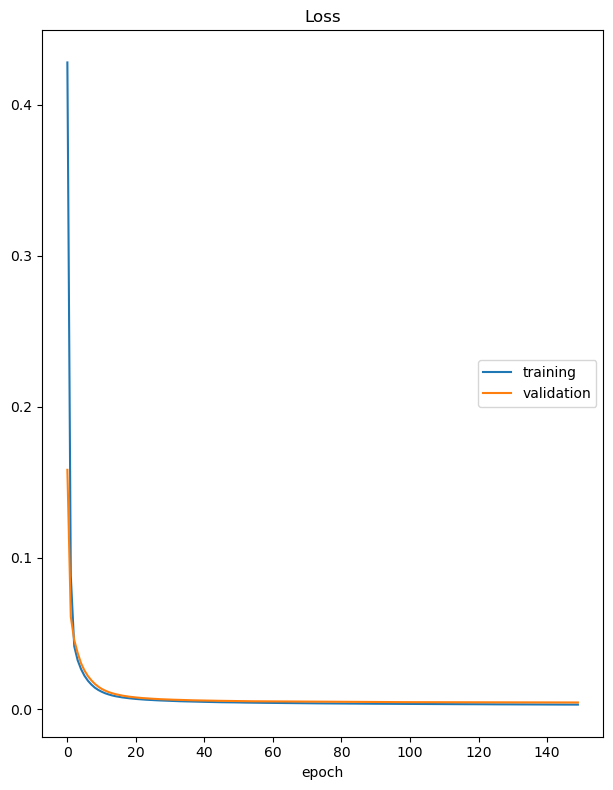

Loss
	training         	 (min:    0.003, max:    0.428, cur:    0.003)
	validation       	 (min:    0.004, max:    0.158, cur:    0.004)
11/11 [==============================] - 0s 18ms/step - loss: 0.0029 - val_loss: 0.0043


In [12]:
# Celda 2
K.clear_session()
model = Sequential()
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))
print(model.summary())
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(X_train, Y_train,
          validation_data = (X_test, Y_test),
          epochs=150, 
          callbacks=[PlotLossesKeras()])

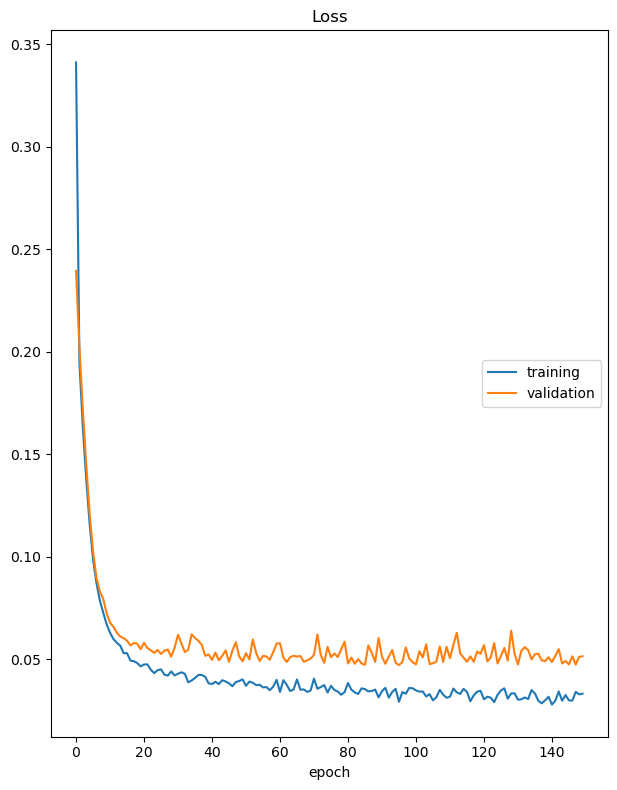

Loss
	training         	 (min:    0.028, max:    0.341, cur:    0.033)
	validation       	 (min:    0.047, max:    0.239, cur:    0.051)
5/5 [==============================] - 0s 2ms/step - loss: 0.0515
Error con MAE
0.05149078369140625


In [13]:
K.clear_session()
model = Sequential()
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))
print(model.summary())
model.compile(optimizer='sgd', loss='mean_absolute_error')
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=150, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])
MAE =model.evaluate(X_test, Y_test)
print("Error con MAE")
print(MAE)

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

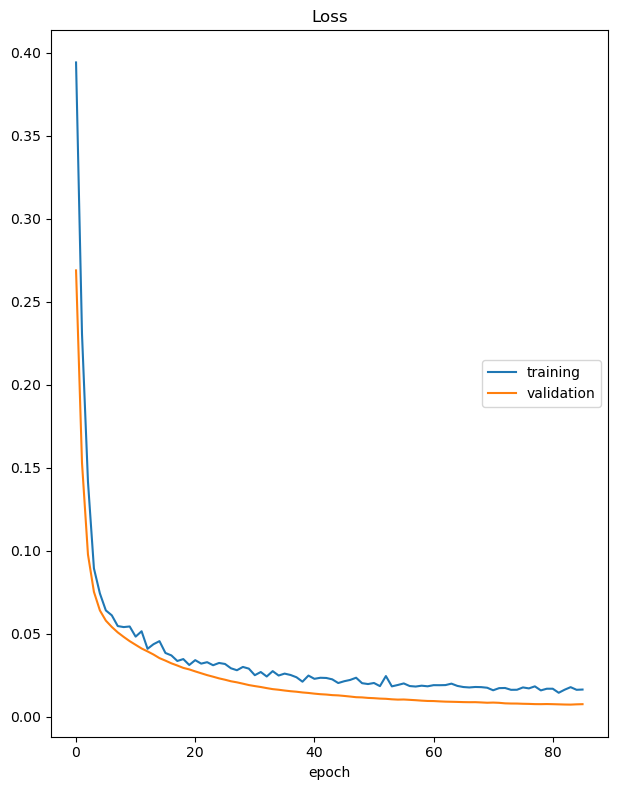

Loss
	training         	 (min:    0.015, max:    0.394, cur:    0.016)
	validation       	 (min:    0.007, max:    0.269, cur:    0.008)
3/3 [==============================] - 0s 84ms/step - loss: 0.0165 - val_loss: 0.0077
Epoch 86: early stopping
5/5 [==============================] - 0s 2ms/step - loss: 0.0077
Error con mse
0.00767228938639164


In [14]:
# Celda 3
K.clear_session()
model = Sequential()
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(output_var))
model.add(Activation('relu'))
print(model.summary())
model.compile(optimizer='sgd', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=2) 
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)
model.fit(X_train, Y_train, 
          verbose=True, 
          epochs=150, 
          batch_size=128,
          validation_data=(X_test,Y_test),
          callbacks=[PlotLossesKeras(),best_model, early_stop])
mse =model.evaluate(X_test, Y_test)
print("Error con mse")
print(mse)

In [15]:
K.clear_session()
model = Sequential()
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(output_var))
model.add(Activation('relu'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-traina

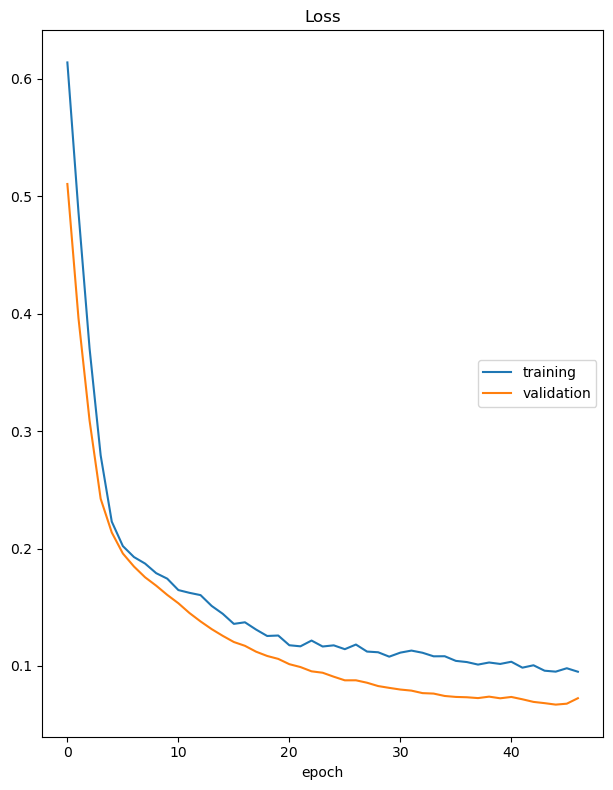

Loss
	training         	 (min:    0.095, max:    0.614, cur:    0.095)
	validation       	 (min:    0.067, max:    0.510, cur:    0.073)
3/3 [==============================] - 0s 198ms/step - loss: 0.0951 - val_loss: 0.0726
Epoch 47: early stopping
5/5 [==============================] - 0s 2ms/step - loss: 0.0726
Error con mae
0.07255161553621292


In [16]:
# Celda 3
model.compile(optimizer='sgd', loss='mean_absolute_error')
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=2) 
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)
model.fit(X_train, Y_train, 
          verbose=True, 
          epochs=150, 
          batch_size=128,
          validation_data=(X_test,Y_test),
          callbacks=[PlotLossesKeras(),best_model, early_stop])
mae =model.evaluate(X_test, Y_test)
print("Error con mae")
print(mae)

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

Como aclaracion para todos los ejercicios excepto el primero tomamos 150 epocas como base y la funcion de activacion RElu esto debido a que encontramos que es la funcion de implementacion mas rapida y que segun casos de literatura para problemas de regresion genera busnos resultados comparados con sus costo computacional

Como primer analisis podemos evidenciar que cuando utilizamos el error cuadrático medio se estabiliza de mejor forma la funcion esto se puede deber a que el conjunto de datos no presente tantos outliers ya que normalmente se presenta mejores desempeños con el error medio absoluto ya que este es más robusto frente a outliers que el error cuadrático medio. Esto significa que el entrenamiento del modelo se ve menos influenciado por datos a tipicos  que pueda haber en el conjunto de entrenamiento.

Segundo vemos que la mejora que se tienen en los modelos al robustecerlo poniendo mas capas pese a que complejisamos el algoritmo y esto nos genera un costo computacional mayor pero que para este caso es un costo admisible ya que se mejora sustancialmente el modelo que se tiene

Por ultimo se evidencia que el uso de herramientas como Early stoping nos ayudan a disminuir el costo computacional por que evita el procesamiento de ciclos adicionales cuando el modelo ya alcanzo una estabilidad en sus diferentes epoca y el droppig es un mecanismo que ayuda a reducir las probabilidades mientras se sobreajusta para cada época del modelo siguiendo el método de abandono, omitiendo las neuronas presentes en la red neuronal de forma aleatoria. 